In [490]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

dta = pd.read_excel("banking_assets.xlsx")
dta.index = dta['Period']
dta = dta.drop(columns = ['Period'])
dta.index = pd.DatetimeIndex(dta.index.values,
                               freq=dta.index.inferred_freq)


,AT,BE,CZ,DK,FI,FR,DE,GR,IE,IT,LU,NL,PL,PT,SI,ES,SE,GB
2004-01-01,591001,831582,78958.227,5.212e+05,194296,4514892,6424183,231820.0,741094,2268600,825179,1484782,110566.504,345009.00,21532.000,1570933,5.318e+05,6.726e+06
2004-02-01,595089,840640,80920.333,5.273e+05,194937,4570370,6448725,232648.0,761385,2255195,819590,1503731,109860.840,343059.00,21738.000,1576550,5.312e+05,6.837e+06
2004-03-01,606158,879536,80984.284,5.511e+05,200996,4546464,6506670,232594.0,795367,2299065,845389,1530152,114352.501,352607.00,21961.000,1599514,5.515e+05,7.087e+06
2004-04-01,607849,870328,82168.669,5.451e+05,204637,4709068,6568777,236720.0,803374,2287857,860406,1559312,114303.234,351776.00,22149.000,1627878,5.778e+05,7.153e+06
2004-05-01,612374,862537,84792.696,5.458e+05,204348,4642713,6583489,238053.0,815030,2292086,851588,1572651,118516.844,350034.00,22249.000,1635199,5.809e+05,7.136e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,1009840,1174866,357489.950,1.229e+06,786483,11189739,9319327,332656.0,1398017,3962228,1334486,2681353,575732.736,434880.42,49185.364,2955565,1.610e+06,1.022e+07
2021-09-01,991668,1179165,353483.663,1.243e+06,796879,11138189,9325255,329734.0,1387767,3955691,1321356,2720655,572351.451,436766.72,48864.533,2968628,1.564e+06,1.032e+07
2021-10-01,1022848,1198403,360292.408,1.238e+06,780189,11418326,9395023,326532.0,1425149,3980498,1365546,2707593,575190.523,438790.13,48819.858,2964104,1.601e+06,1.065e+07
2021-11-01,1019785,1203152,365253.663,1.253e+06,771945,11482296,9495473,331330.0,1466443,4004323,1394269,2736794,579727.267,439482.09,48937.750,3024037,1.626e+06,1.091e+07


<AxesSubplot:xlabel='Period'>

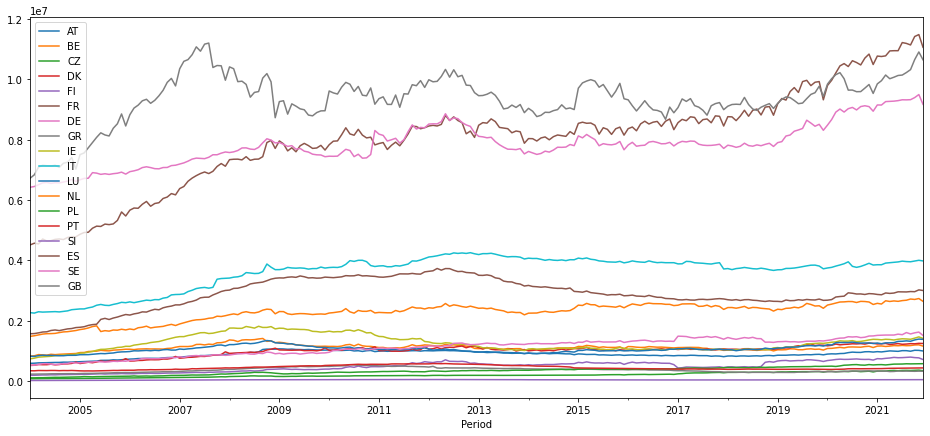

In [63]:
fig, ax = plt.subplots(figsize = (16,7))
dta.plot( ax = ax)

,AT,BE,CZ,DK,FI,FR,DE,GR,IE,IT,LU,NL,PL,PT,SI,ES,SE,GB
2004-01-01,-2.568,-2.797,-1.629,-2.556,-1.760,-2.203,-2.101,-1.764,-1.996,-2.423,-1.957,-2.634,-1.856,-1.411,-2.516,-2.543,-2.059,-3.208
2004-02-01,-2.533,-2.708,-1.604,-2.523,-1.756,-2.168,-2.064,-1.754,-1.919,-2.447,-2.001,-2.572,-1.862,-1.438,-2.492,-2.532,-2.061,-3.071
2004-03-01,-2.438,-2.324,-1.603,-2.394,-1.720,-2.183,-1.978,-1.755,-1.790,-2.368,-1.797,-2.485,-1.826,-1.304,-2.466,-2.488,-1.990,-2.762
2004-04-01,-2.423,-2.415,-1.587,-2.427,-1.699,-2.081,-1.886,-1.702,-1.760,-2.388,-1.678,-2.389,-1.826,-1.316,-2.444,-2.434,-1.899,-2.682
2004-05-01,-2.384,-2.492,-1.553,-2.423,-1.700,-2.123,-1.864,-1.685,-1.715,-2.381,-1.747,-2.345,-1.792,-1.340,-2.432,-2.420,-1.888,-2.702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,1.042,0.588,2.022,1.272,1.771,1.982,2.199,-0.487,0.499,0.605,2.079,1.310,1.899,-0.145,0.736,0.120,1.688,1.098
2021-09-01,0.885,0.630,1.969,1.346,1.833,1.950,2.208,-0.524,0.460,0.594,1.975,1.440,1.871,-0.119,0.699,0.145,1.529,1.217
2021-10-01,1.154,0.820,2.058,1.319,1.733,2.126,2.311,-0.564,0.602,0.638,2.326,1.397,1.894,-0.090,0.693,0.136,1.658,1.626
2021-11-01,1.127,0.867,2.123,1.400,1.684,2.166,2.460,-0.504,0.759,0.681,2.553,1.493,1.931,-0.081,0.707,0.252,1.745,1.937


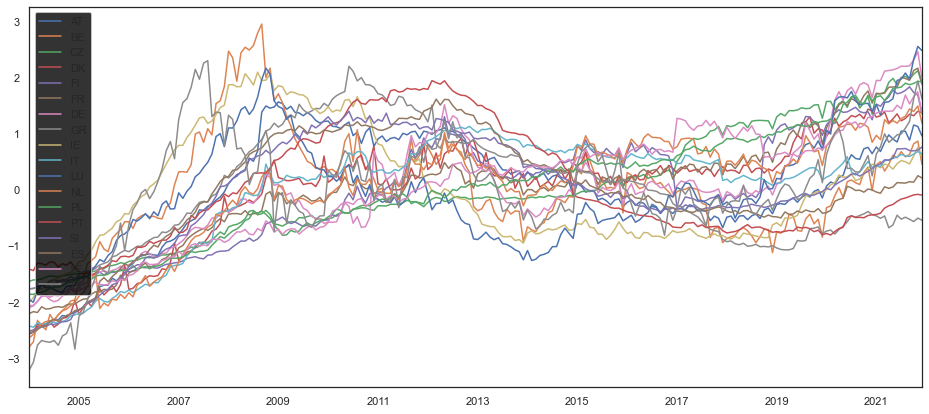

In [461]:
# transoform data
df = dta


for i in dta.columns:
    df[i] = (dta[i]-np.ones(len(dta))*dta[i].mean())/dta[i].std()

fig, ax = plt.subplots(figsize = (16,7))
df.plot( ax = ax)
df

<MonthBegin>


,AT,BE,CZ,DK,FI,FR,DE,GR,IE,IT,LU,NL,PL,PT,SI,ES,SE,GB
2004-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,-0.106,-0.129,-0.145,0.019,-0.009,-0.072,0.034,NaN,-0.285,-0.178,0.008,-0.013,0.029,NaN,-1.656e-02,-0.108,0.249,0.050
2021-09-01,-0.783,0.079,-0.270,0.059,0.028,-0.088,0.043,NaN,-0.386,-0.124,-0.146,0.104,-0.243,NaN,-1.191e-01,0.632,-0.432,0.056
2021-10-01,1.042,0.267,-0.054,-0.076,-0.308,0.118,0.102,NaN,0.564,0.126,0.173,-0.130,-0.103,NaN,-4.474e-02,-0.204,0.047,0.316
2021-11-01,-0.187,0.065,-0.095,0.064,-0.207,-0.017,0.126,NaN,0.463,0.105,0.069,0.052,-0.066,NaN,3.850e-04,2.033,-0.031,0.157


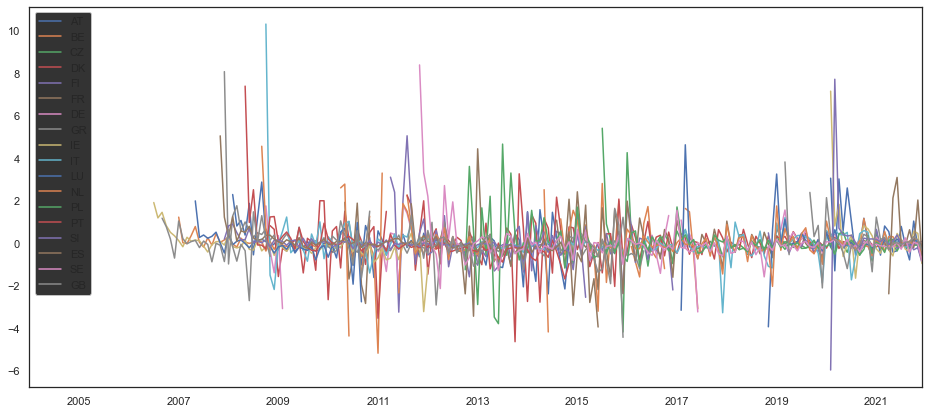

In [462]:
df = np.log(dta).diff()

for i in dta.columns:
    df[i] = (df[i]-np.ones(len(df))*df[i].mean())/df[i].std()

fig, ax = plt.subplots(figsize = (16,7))
df.plot( ax = ax)
print(df.index.freq)
df

In [64]:
df.index.freq = df.index.inferred_freq

endog = df
mod = sm.tsa.DynamicFactor(endog, k_factors=1, factor_order=2, 
                           error_order=2)

initial_res = mod.fit(method='powell', disp=False)
res = mod.fit(initial_res.params, disp=False)

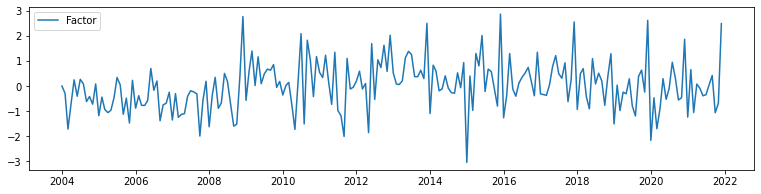

In [66]:
fig, ax = plt.subplots(figsize=(13,3))

# Plot the factor
dates = endog.index._mpl_repr()
ax.plot(dates, res.factors.filtered[0], label='Factor')
ax.legend()


In [101]:
def compute_coincident_index(mod, res):
    # Estimate W(1)
    spec = res.specification
    design = mod.ssm['design']
    transition = mod.ssm['transition']
    ss_kalman_gain = res.filter_results.kalman_gain[:,:,-1]
    k_states = ss_kalman_gain.shape[0]

    W1 = np.linalg.inv(np.eye(k_states) - np.dot(
        np.eye(k_states) - np.dot(ss_kalman_gain, design),
        transition
    )).dot(ss_kalman_gain)[0]

    # Compute the factor mean vector
    factor_mean = np.dot(W1, df.mean(axis = 0))

    # Normalize the factors
    factor = res.factors.filtered[0]

    # Compute the coincident index
    coincident_index = np.zeros(mod.nobs+1)
    # The initial value is arbitrary; here it is set to
    # facilitate comparison
    coincident_index[0] = 1* factor_mean 
    for t in range(0, mod.nobs):
        coincident_index[t+1] = coincident_index[t] + factor[t] + factor_mean

    # Attach dates
    coincident_index = pd.Series(coincident_index[:len(df.index)], index=df.index)
    return coincident_index

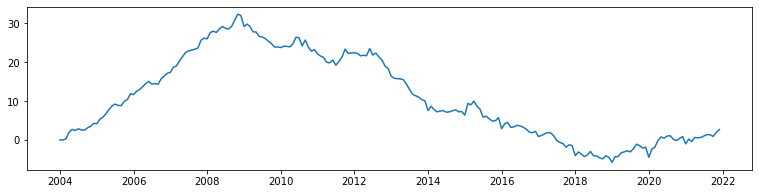

In [103]:
fig, ax = plt.subplots(figsize=(13,3))

dates = df.index._mpl_repr()
# Compute the index
coincident_index = -compute_coincident_index(mod, res)
ax.plot(dates, coincident_index, label='Coincident index')

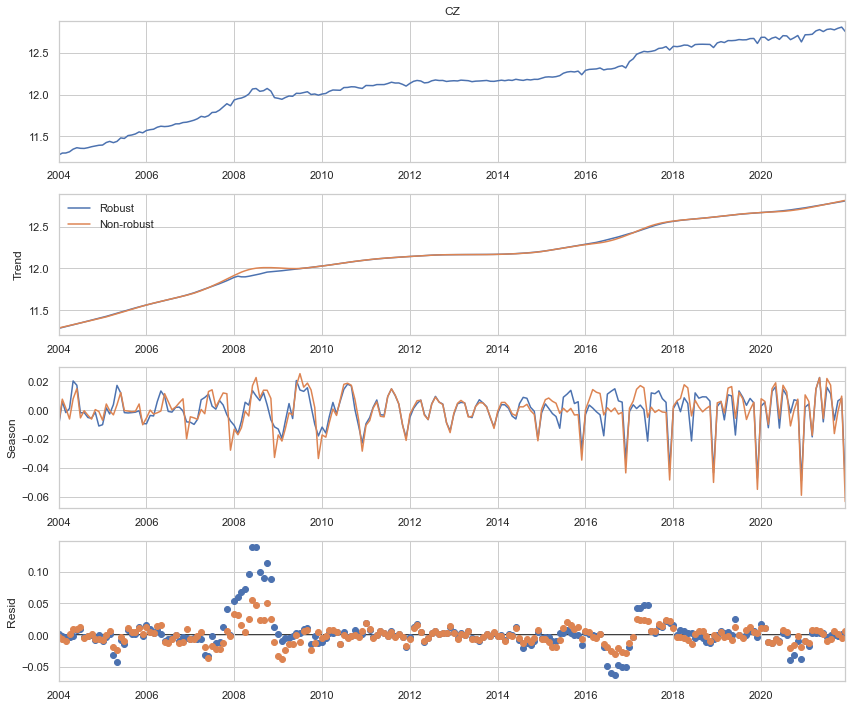

In [492]:
# decomposition
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL

plt.rcParams["figure.figsize"] = (12,10)
dta = pd.read_excel("banking_assets.xlsx")
dta.index = dta['Period']
dta = dta.drop(columns = ['Period'])
dta.index = pd.DatetimeIndex(dta.index.values,
                               freq=dta.index.inferred_freq)
dta = dta.apply(np.log)
df = dta

def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none")
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)
c = 'CZ'
stl = STL(df[c], period=12, robust=True)

res_robust = stl.fit()
fig = res_robust.plot()
res_non_robust = STL(df[c], period=12, robust=False).fit()
add_stl_plot(fig, res_non_robust, ["Robust", "Non-robust"])
plt.savefig('decomp.jpg')

<AxesSubplot:>

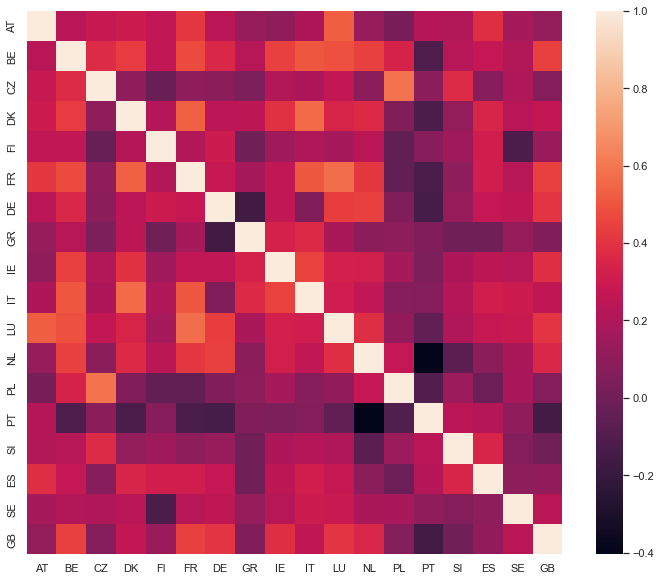

In [493]:
df = dta
df.index = pd.DatetimeIndex(df.index.values,
                               freq=df.index.inferred_freq)

df_empty = pd.DataFrame(index=df.index,columns=df.columns)

for i in df_empty.columns:
    stl = STL(df[i], period=12, robust=True)
    res_robust = stl.fit()
    df_empty[i] = res_robust.resid/res_robust.resid.std()
    
df = df_empty


sns.heatmap(df.corr())


<AxesSubplot:>

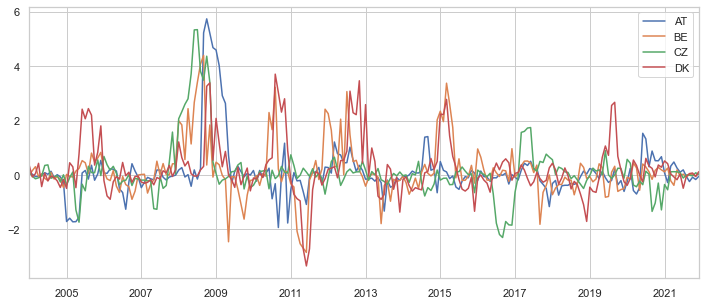

In [484]:
plt.rcParams["figure.figsize"] = (12,5)
df.iloc[:,:4].plot()

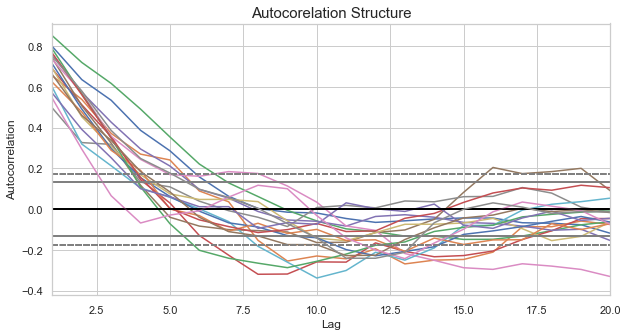

In [494]:
fig, ax = plt.subplots(figsize = (10,5))
for i in list(df.columns):
    pd.plotting.autocorrelation_plot(df[i], ax = ax)
ax.set_xlim(1,20)
ax.set_title('Autocorelation Structure', fontsize =15)
plt.savefig("acplot.jpg")

C:\Users\Illichmann_skolni\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

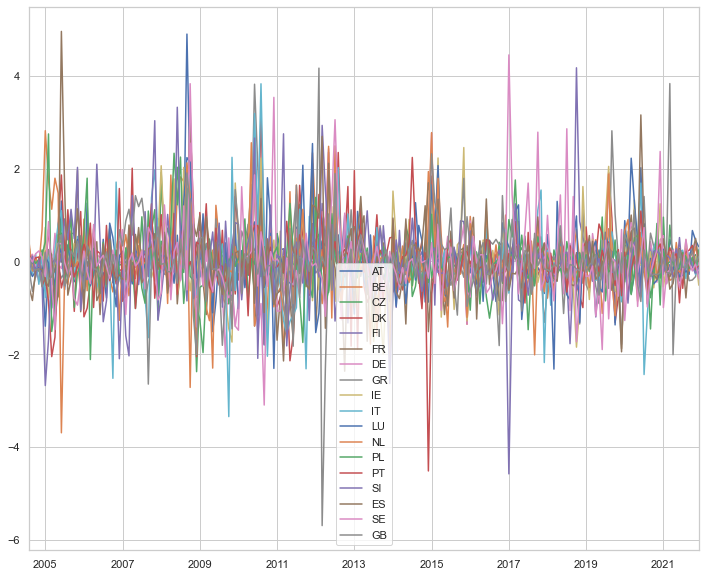

In [510]:
from statsmodels.tsa.ar_model import AutoReg as ar
df = df
l = 4
for i in list(df.columns):
    armod = ar(df[i], lags = l).fit()
    df[i] = armod.resid

df = df.tail(-l)
df.plot()

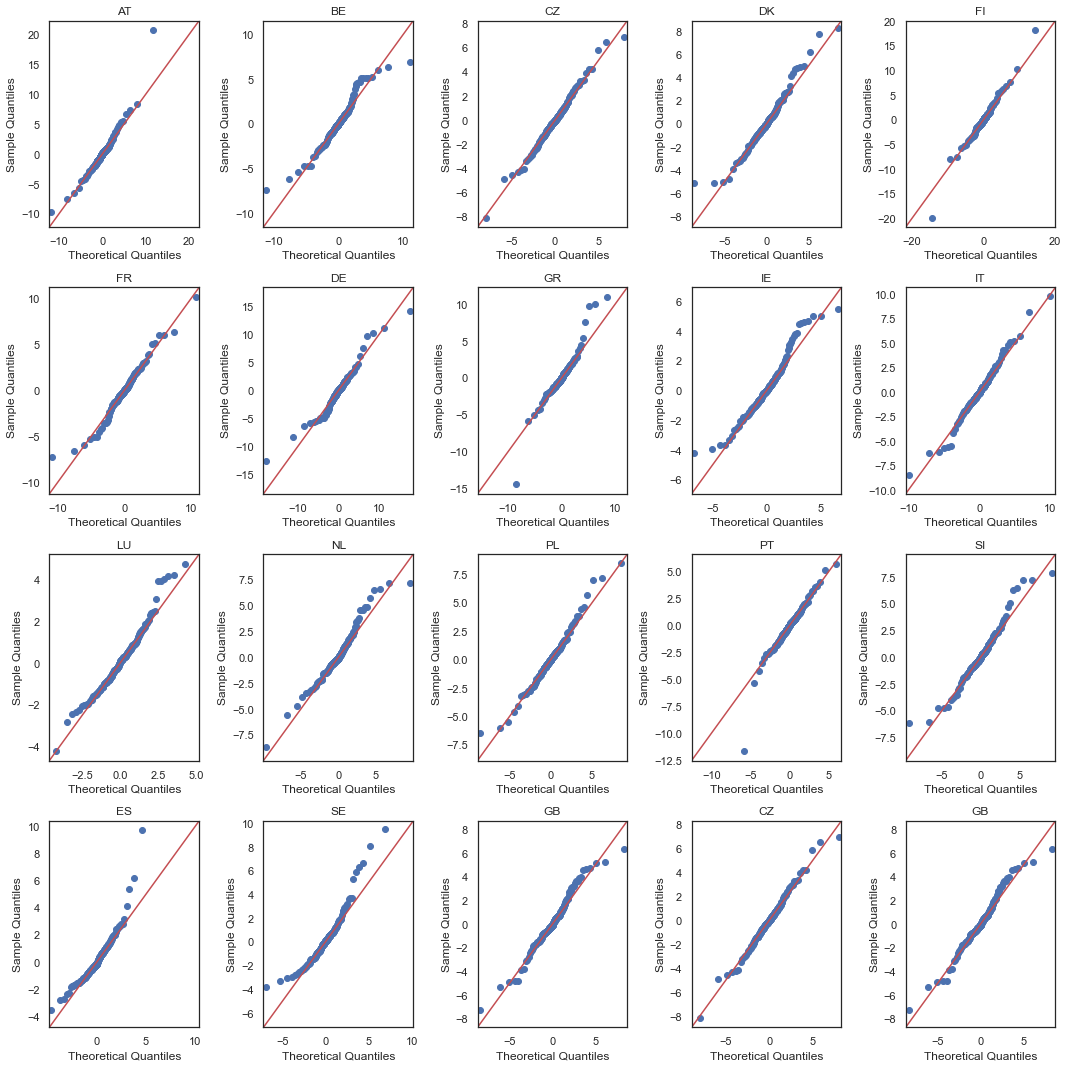

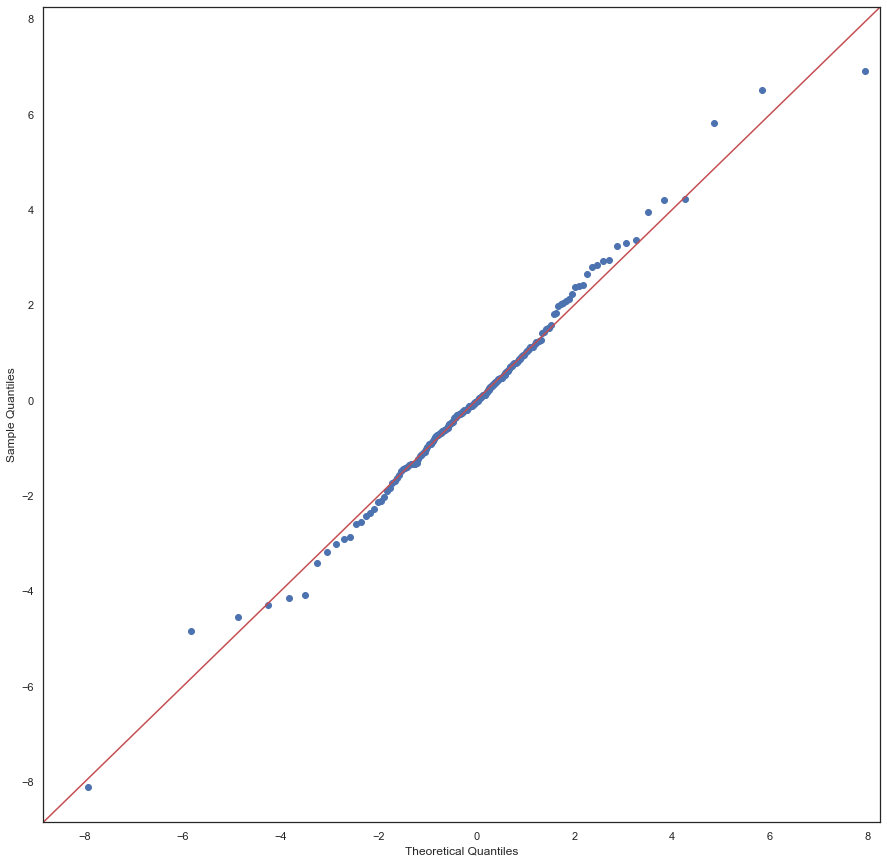

In [474]:
import scipy.stats as stats

cols = list(df.columns)
cols2 = np.array(cols+ ['CZ','GB'])

n = len(cols)
r =int(np.sqrt(n))
s = r+1

fig, ax = plt.subplots(r,s,figsize = (15,15))

m = cols2.reshape(r,s)


for i in range(r):
    for j in range(s):
        sm.qqplot(df[m[i,j]], stats.t, fit=True, line="45", ax = ax[i,j])
        ax[i,j].set_title(m[i,j])
plt.tight_layout()

fig, ax = plt.subplots(figsize = (15,15))
sm.qqplot(df['CZ'], stats.t, fit=True, line="45", ax = ax)
plt.savefig('qqplot.jpg')

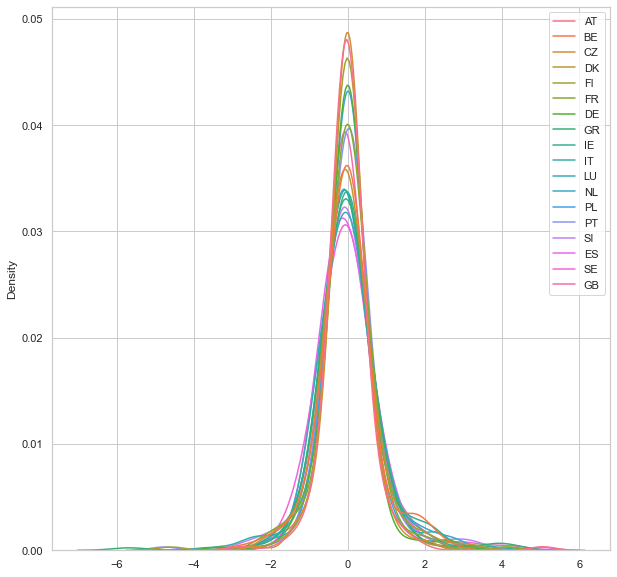

In [439]:
fig, ax = plt.subplots(figsize = (10,10))
sns.kdeplot(data=df,bw_adjust = 1.5, ax = ax)
plt.savefig('kde.jpg')

C:\Users\Illichmann_skolni\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='date', ylabel='value'>

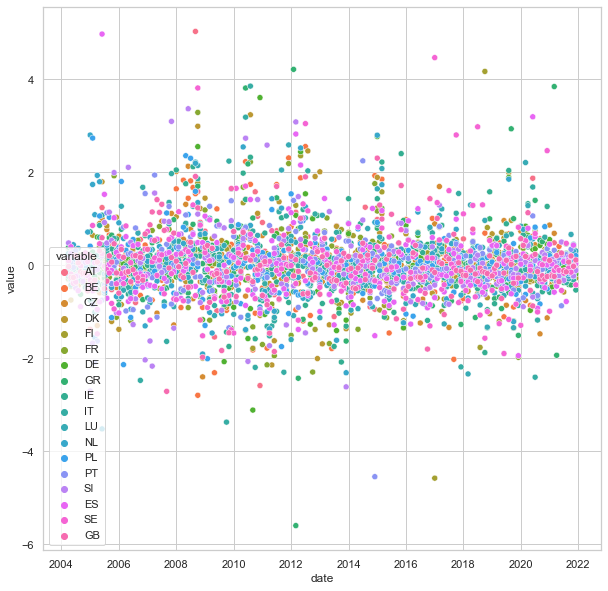

In [506]:
pooled = df
pooled['date'] = df.index
pooled = pd.melt(pooled,id_vars = ['date'], value_vars = list(df.columns))
pooled
fig, ax = plt.subplots(figsize = (10,10))
sns.scatterplot(pooled, x = 'date', y ='value', hue = 'variable')

In [523]:
pd.set_option("display.precision", 3)
df = dta

df_empty = pd.DataFrame(index=df.index,columns=df.columns)

for i in df_empty.columns:
    stl = STL(df[i], period=12, robust=True)
    res_robust = stl.fit()
    df_empty[i] = res_robust.resid/res_robust.resid.std()
    
df = df_empty
l = 4
from statsmodels.tsa.ar_model import AutoReg as ar
for i in list(df.columns):
    armod = ar(df[i], lags = l).fit()
    df[i] = armod.resid

df = df.tail(-l)
#==========================================================================
var = list(df.columns)

k = len(var)
coefs = pd.DataFrame(np.zeros([k,k]), columns = names,
                     index = [f'{i}*' for i in names])

from sklearn import linear_model
from math import e

lasso = linear_model.Lasso(alpha = e**(-2.5), max_iter = 100000)

for i in var:
    y = df[i]
    X = df.drop(i, axis = 1)
    fit = lasso.fit(X, y)
    β = fit.coef_
    
    namesx = list(X.columns)
    row = pd.Series(dict(zip(namesx,  β)))
    for j in namesx:
        coefs.loc[f'{i}*',j] = row.loc[j]
        
        
tab = coefs[coefs!=0]

m = tab.shape

for i in range(m[0]):
    for j in range(m[0]):
        if tab.iloc[i,j]<0:
            tab.iloc[j,i] = tab.iloc[j,i] - tab.iloc[i,j]
            tab.iloc[i,j] = 0

tab = tab.fillna('-')
tab

,AT,BE,CZ,DK,FI,FR,DE,GR,IE,IT,LU,NL,PL,PT,SI,ES,SE,GB
AT*,-,-,-,0.021,-,-,-,-,-,-,0.076,-,-,-,-,0.074,-,-
BE*,-,-,-,-,-,-,-,-,-,0.13,0.109,0.072,-,-,-,-,-,0.02
CZ*,-,-,-,-,-,-,-,-,-,-,-,-,0.06,-,-,-,-,-
DK*,0.002,-,-,-,-,0.131,0.036,-,0.044,0.149,-,-,-,-,-,-,0.004,-
FI*,-,-,-,-,-,-,0.142,-,-,-,0.014,0.025,-,-,0.007,0.005,-,-
FR*,-,-,-,0.1,-,-,-,-,-,0.071,0.169,0.058,-,-,-,-,-,-
DE*,-,-,-,0.005,0.099,-,-,-,-,-,0.024,0.183,-,-,-,-,-,0.042
GR*,-,-,-,-,-,-,-,-,-,0.071,-,-,-,-,-,-,-,-
IE*,-,-,-,0.046,-,-,-,-,-,0.081,0.0,0.05,-,-,-,0.02,-,0.157
IT*,-,0.122,-,0.164,-,0.106,-,0.028,0.053,-,-,-,-,-,0.012,0.016,0.004,-


In [517]:
latx = tab.to_latex()
print(latx)

\begin{tabular}{lllllllllllllllllll}
\toprule
{} &     AT &     BE &    CZ &     DK &     FI &     FR &     DE &     GR &     IE &     IT &     LU &     NL &     PL &     PT &     SI &     ES &     SE &     GB \\
\midrule
AT* &      - &      - &     - &   0.02 &      - &      - &      - &      - &      - &      - &  0.073 &      - &      - &      - &      - &  0.082 &      - &      - \\
BE* &      - &      - &     - &      - &      - &      - &      - &      - &      - &   0.13 &  0.106 &  0.072 &      - &      - &      - &      - &      - &  0.021 \\
CZ* &      - &      - &     - &      - &      - &      - &      - &      - &      - &      - &      - &      - &  0.052 &      - &      - &      - &      - &      - \\
DK* &    0.0 &      - &     - &      - &      - &  0.162 &   0.03 &      - &  0.036 &  0.159 &      - &  0.006 &      - &      - &      - &      - &      - &      - \\
FI* &      - &      - &     - &      - &      - &      - &  0.129 &      - &      - &      - &  0.012 &   

In [518]:
coefs

,AT,BE,CZ,DK,FI,FR,DE,GR,IE,IT,LU,NL,PL,PT,SI,ES,SE,GB
AT*,0.000e+00,0.000,0.00,0.020,0.000,0.000,0.000,-0.000,-0.000,0.000,7.321e-02,0.000,0.000,0.000,0.000,0.082,0.000,0.000
BE*,0.000e+00,0.000,-0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.130,1.065e-01,0.072,0.000,-0.000,0.000,0.000,-0.000,0.021
CZ*,0.000e+00,-0.000,0.00,0.000,-0.000,0.000,0.000,0.000,-0.000,0.000,-0.000e+00,-0.000,0.052,-0.000,0.000,0.000,0.000,0.000
DK*,3.126e-04,0.000,0.00,0.000,0.000,0.162,0.030,0.000,0.036,0.159,0.000e+00,0.006,0.000,0.000,0.000,0.000,0.000,0.000
FI*,0.000e+00,0.000,-0.00,0.000,0.000,0.000,0.129,-0.000,0.000,0.000,1.231e-02,0.030,-0.000,0.000,0.000,0.009,-0.000,0.000
FR*,0.000e+00,0.000,0.00,0.125,0.000,0.000,0.000,-0.000,0.000,0.065,1.833e-01,0.058,-0.000,-0.000,-0.000,0.000,0.000,0.000
DE*,0.000e+00,0.000,0.00,0.002,0.086,0.000,0.000,-0.000,0.000,-0.000,2.250e-02,0.186,-0.000,0.000,0.000,0.000,0.000,0.046
GR*,-0.000e+00,0.003,0.00,0.000,-0.000,0.000,-0.000,0.000,0.000,0.091,0.000e+00,0.000,0.000,0.000,-0.012,-0.000,0.003,0.000
IE*,-0.000e+00,0.000,-0.00,0.041,0.000,0.000,0.000,0.000,0.000,0.091,2.725e-04,0.049,0.000,0.000,0.000,0.024,0.000,0.152
IT*,0.000e+00,0.114,0.00,0.173,0.000,0.098,-0.000,0.039,0.059,0.000,0.000e+00,0.000,0.000,0.000,0.009,0.018,0.007,-0.000


   variable_new target_new      value
0            DK         AT  1.817e-02
1            FR         DK  3.176e-02
2            DE         DK  3.065e-02
3            DE         FI  4.335e-02
4            DK         IE  1.845e-03
5            IT         BE  8.243e-03
6            DK         IT  1.593e-02
7            FR         IT  3.457e-02
8            IT         GR  4.271e-02
9            IT         IE  2.854e-02
10           LU         AT  3.495e-02
11           LU         BE  2.817e-02
12           LU         FI  1.417e-02
13           FR         LU  1.755e-02
14           LU         DE  7.733e-03
15           IE         LU  1.082e-02
16           NL         BE  2.347e-02
17           NL         FI  2.491e-02
18           FR         NL  2.592e-02
19           DE         NL  4.552e-02
20           NL         IE  4.055e-03
21           CZ         PL  1.750e-02
22           FI         SI  2.170e-02
23           IT         SI  1.779e-02
24           AT         ES  5.079e-02
25          

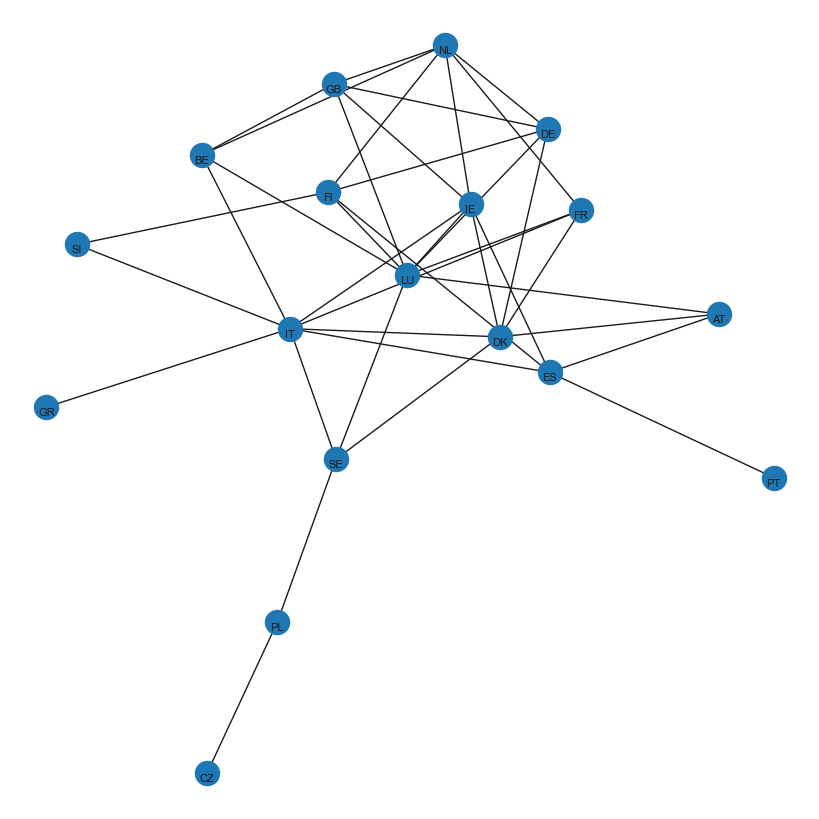

In [524]:
dim = coefs.shape
results = pd.DataFrame(np.zeros(dim),index = coefs.index, columns = coefs.columns)


for i in range(dim[0]):
    for j in range(dim[0]):
        results.iloc[i,j] = coefs.iloc[i,j] - coefs.iloc[j,i]
        if i>j:
            results.iloc[i,j] = 0

results['target'] = results.index
results = pd.melt(results,id_vars = ['target'], value_vars = coefs.columns)
results = results[results['value']!=0]
results.index = range(len(results))

results['target_new'] = np.zeros(len(results))
results['variable_new'] = np.zeros(len(results))

for i in range(len(results)):
    if results.loc[i,'value']<0:
        results.loc[i,'target_new']  = results.loc[i,'variable']
        results.loc[i,'variable_new']  = results.loc[i,'target'].replace('*', '')
    if results.loc[i,'value']>0:
        results.loc[i,'target_new']  = results.loc[i,'target'].replace('*', '')
        results.loc[i,'variable_new']  = results.loc[i,'variable']

network = pd.DataFrame(results[['variable_new','target_new','value']])
network['value'] = abs(network['value'])
network

import networkx as nx
print(network)

Graph = nx.from_pandas_edgelist(network, source = 'variable_new',target = 'target_new', edge_attr = 'value')

plt.figure(figsize=(8, 8), dpi=100)
nx.draw_kamada_kawai(Graph, with_labels=True, connectionstyle='arc3', rad = 0.0, font_size= 8,
       verticalalignment = 'top')
plt.savefig('network.jpg')
plt.show()


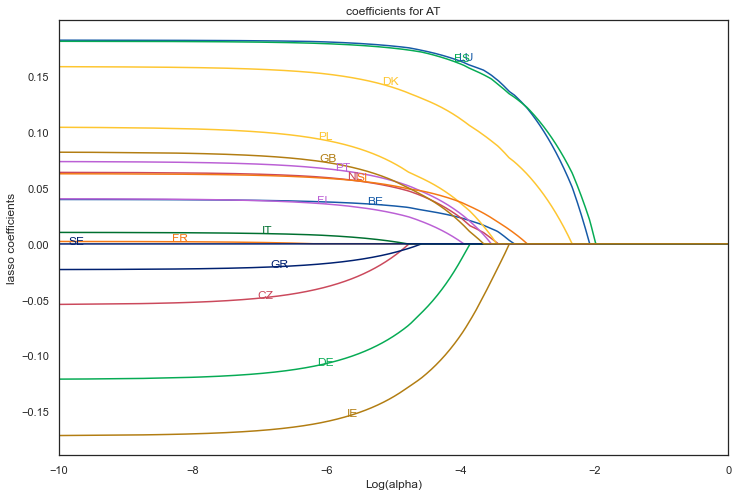

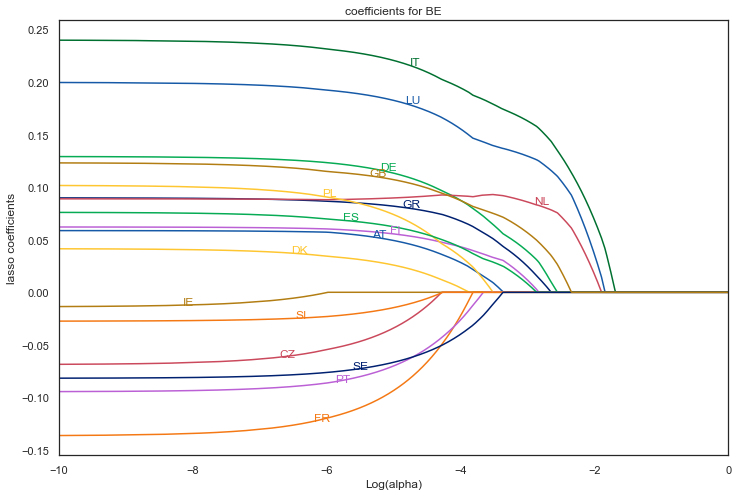

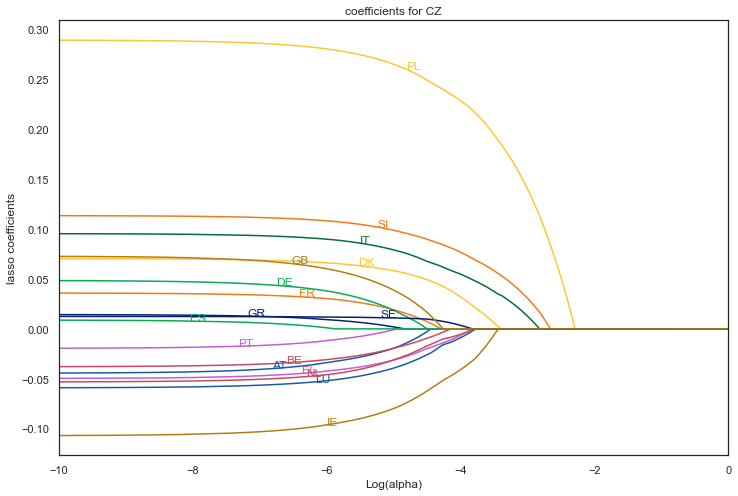

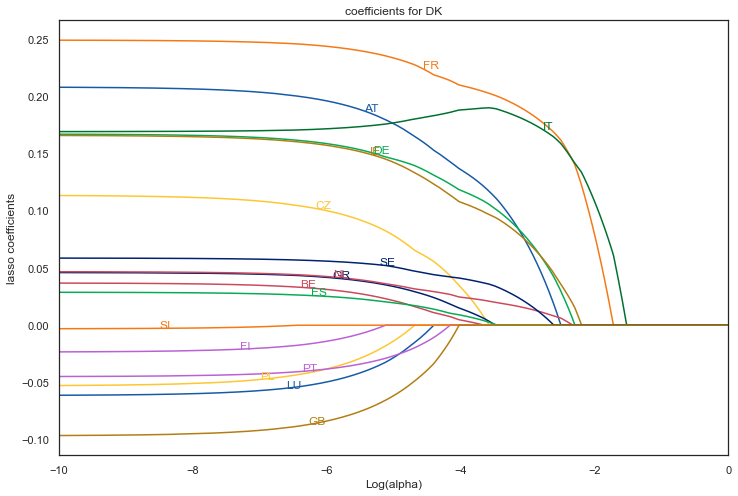

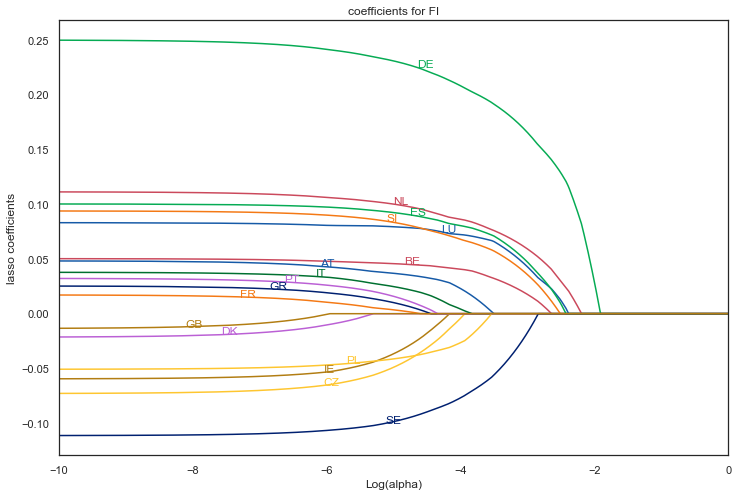

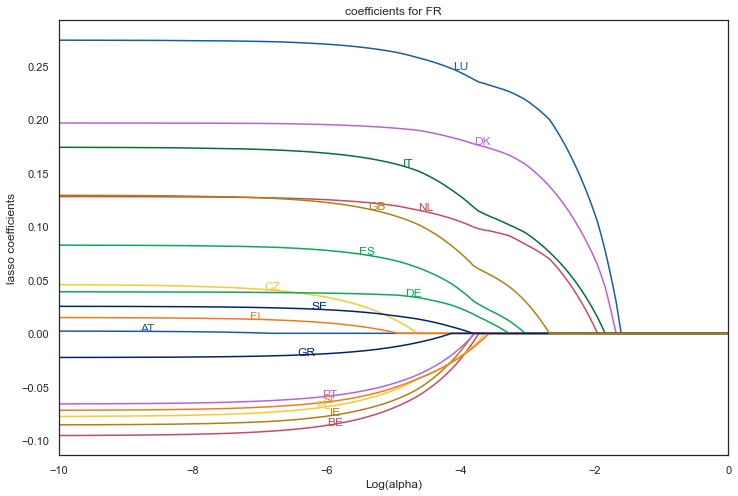

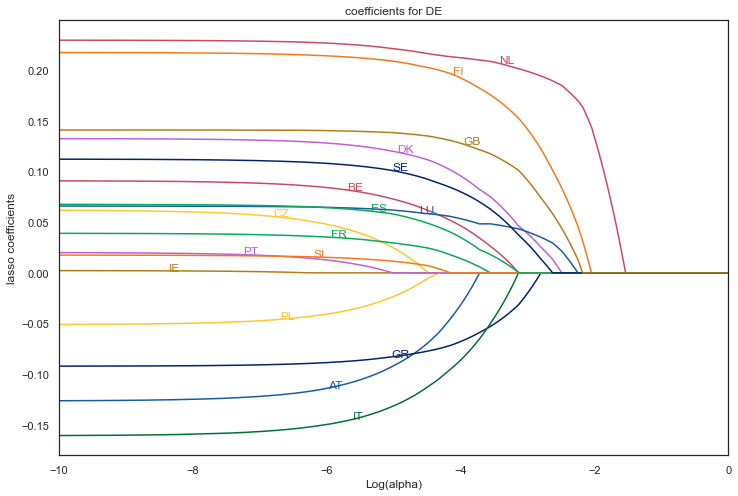

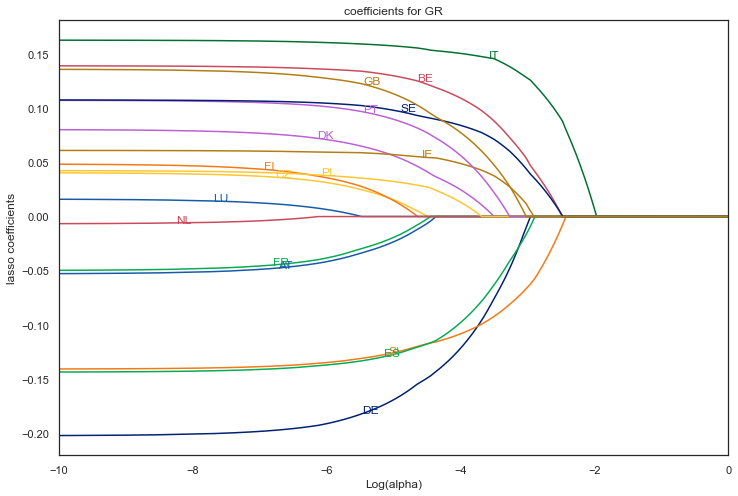

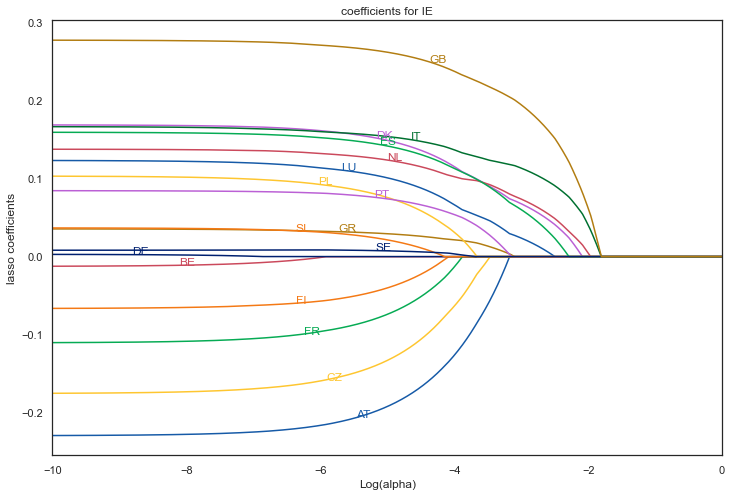

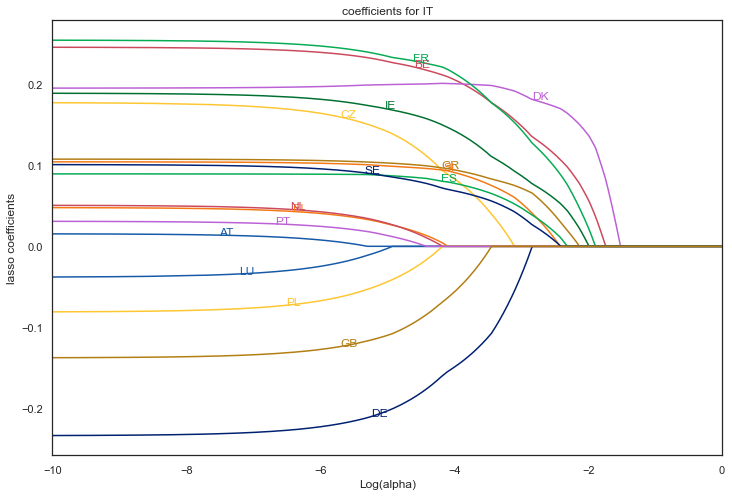

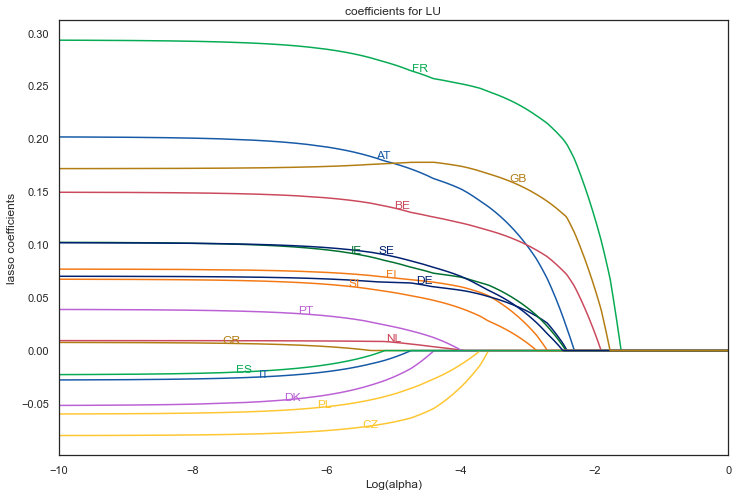

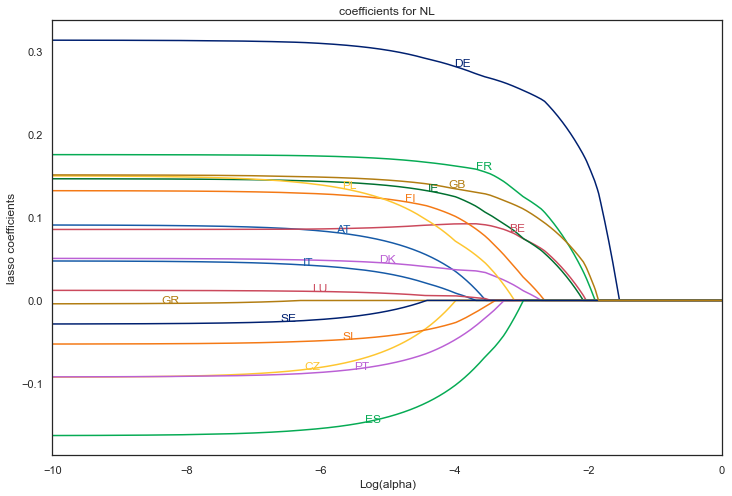

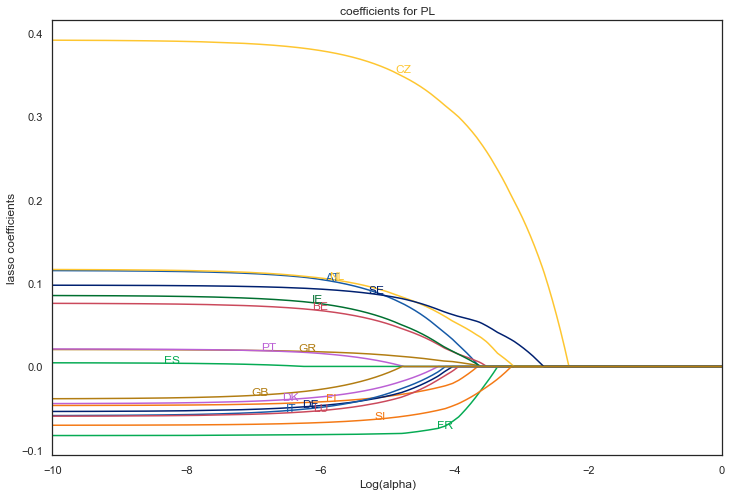

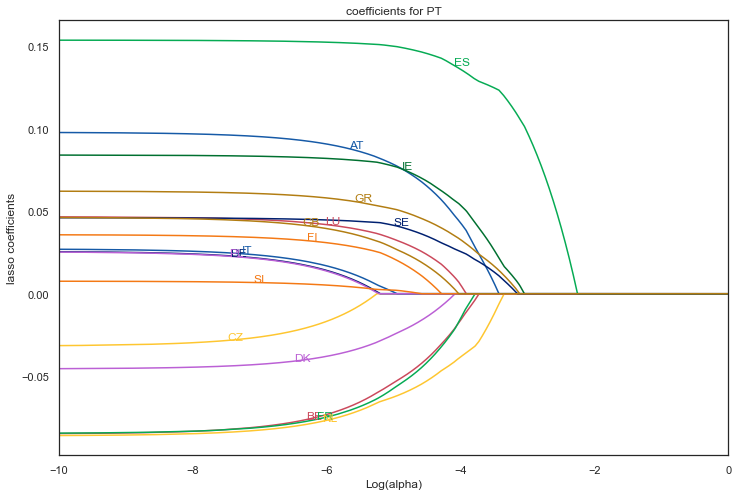

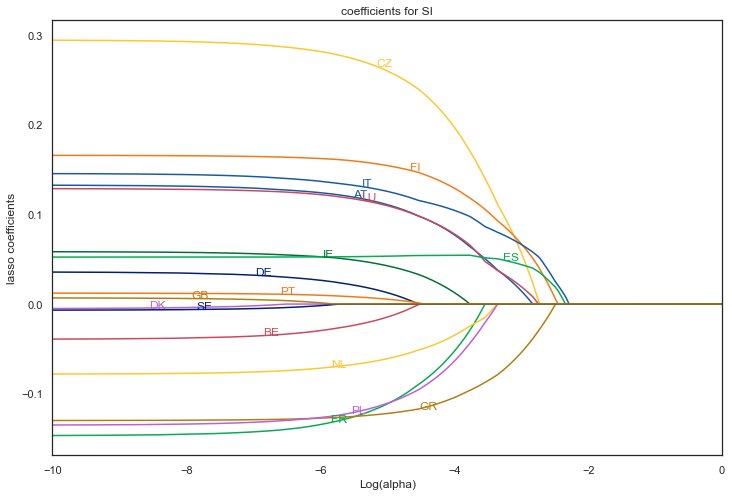

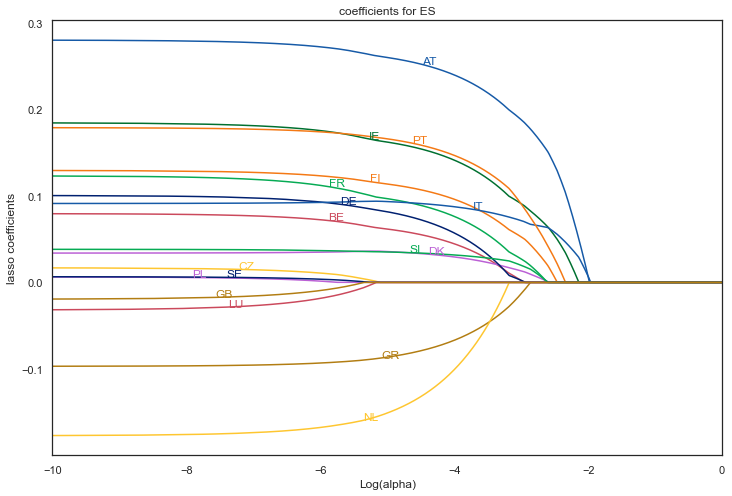

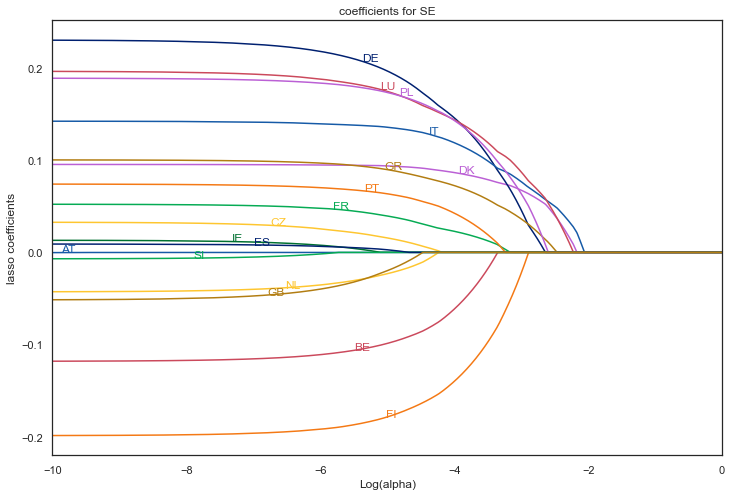

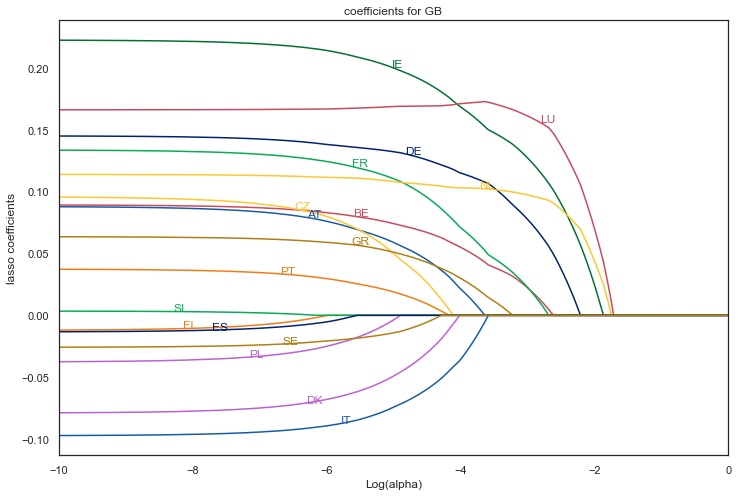

In [478]:
from itertools import cycle
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)},font_scale=1)
alphas = np.exp(np.linspace(-10,0, 1000))

df = df
colors = ['#165aa7', '#cb495c', '#fec630', 
          '#bb60d5', '#f47915', '#06ab54', '#002070', '#b27d12', '#007030']

for k in list(df.columns):
    y = df[k]
    X = df.drop(k, axis = 1)
    
    alphas, coefs_lasso, _ = linear_model.lasso_path(X, y, alphas=alphas, max_iter=10000)
    #coefs_lasso = coefs_lasso[:len(fields)-1,:]
    
    fig, ax = plt.subplots(figsize=(12, 8))
    color_cycle = cycle(colors)
    log_alphas = np.log(alphas)
    for coef_l, c, name in zip(coefs_lasso, color_cycle, list(X)):
        ax.plot(log_alphas, coef_l, c=c)
        ax.set_xlabel('Log(alpha)')
        ax.set_ylabel('lasso coefficients')
        ax.set_title(f'coefficients for {k}')
        ax.axis('tight')
        maxabs = np.max(np.abs(coef_l))
        i = [idx for idx in range(len(coef_l)) if abs(coef_l[idx]) >= (0.9*maxabs)][0]
        xnote = log_alphas[i]
        ynote = coef_l[i]
        ax.annotate(name, (xnote, ynote), color=c)
        
        ax.set_xlim(min(np.log(alphas)),max(np.log(alphas)))
    plt.savefig(f'{k}.jpg')




C:\Users\Illichmann_skolni\anaconda3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.


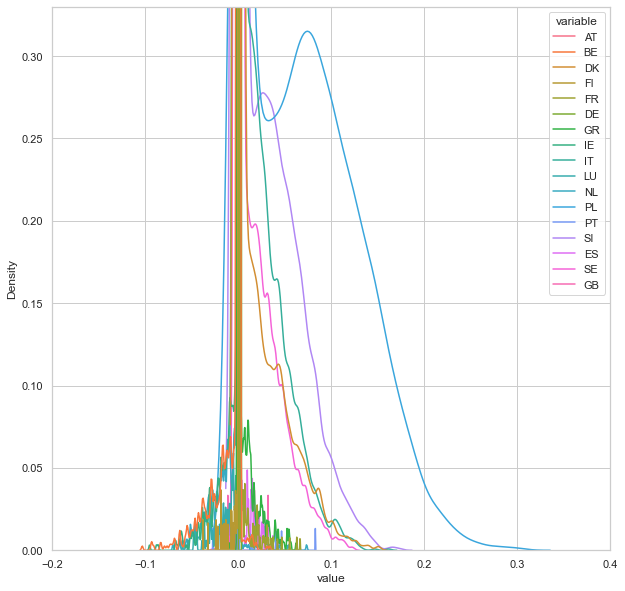

In [525]:
#bootstrap
sns.set_style("whitegrid")

c = 'CZ'
N = 10000
df = df

lasso = linear_model.Lasso(alpha = e**(-2.5), max_iter = 100000)

simsteps = range(0,N)
df_empty = pd.DataFrame(index=simsteps, columns=df.columns)

for i in simsteps:
    sample =df.sample( n = 100, axis = 0)
    y = sample[c]
    X = sample.drop(c, axis = 1)
    fit = lasso.fit(X, y)
    β = fit.coef_
    
    namesx = list(X.columns)
    row = pd.Series(dict(zip(namesx,  β)))
   
    for j in namesx:
        df_empty.loc[i,j] = row[j]

btres = df_empty.drop(c, axis = 1)

btres = pd.melt(btres, value_vars = list(btres.columns))



fig, ax = plt.subplots(figsize = (10,10))
sns.kdeplot(btres, x='value', hue = 'variable', bw_adjust = 1, ax = ax)

ax.set_xlim(-0.2,0.4)
ax.set_ylim(0,0.33)
plt.savefig('boot.jpg')